In [2]:
!unzip "/content/drive/MyDrive/Dataset-20230701T090944Z-001.zip"

Archive:  /content/drive/MyDrive/Dataset-20230701T090944Z-001.zip
  inflating: Dataset/test/pale nail/35.PNG  
  inflating: Dataset/test/pale nail/24.PNG  
  inflating: Dataset/test/pale nail/23.PNG  
  inflating: Dataset/test/white nail/17.PNG  
  inflating: Dataset/test/pale nail/12.PNG  
  inflating: Dataset/test/white nail/6.PNG  
  inflating: Dataset/test/white nail/18.PNG  
  inflating: Dataset/test/white nail/16.PNG  
  inflating: Dataset/test/leukonychia/31.PNG  
  inflating: Dataset/test/red lunula/1.PNG  
  inflating: Dataset/test/leukonychia/2.PNG  
  inflating: Dataset/test/leukonychia/21.PNG  
  inflating: Dataset/test/leukonychia/19.PNG  
  inflating: Dataset/test/red lunula/10.PNG  
  inflating: Dataset/test/red lunula/11.PNG  
  inflating: Dataset/test/leukonychia/32.PNG  
  inflating: Dataset/test/terry_s nail/23.PNG  
  inflating: Dataset/test/pale nail/13.PNG  
  inflating: Dataset/test/leukonychia/4.PNG  
  inflating: Dataset/test/red lunula/9.PNG  
  inflating: Dat

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load pre-trained DenseNet and ResNet models
densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Load the pre-trained ResNet50 model without the top/fully-connected layers
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Set the last few layers of the pre-trained models to be trainable
for layer1 in densenet.layers:
    layer1.trainable = False
for layer2 in resnet.layers:
    layer2.trainable = False

# Set hyperparameters and configurations
num_classes = 17
batch_size = 22
learning_rate = 0.0001
num_epochs = 100

# Combine DenseNet and ResNet50 models
input_layer = tf.keras.Input(shape=(224, 224, 3))
densenet_output = densenet(input_layer)
resnet_output = resnet(input_layer)

# Add global average pooling layer
densenet1_output = GlobalAveragePooling2D()(densenet_output)
resnet1_output = GlobalAveragePooling2D()(resnet_output)

# Concatenate DenseNet and ResNet50 outputs
combined_output = tf.keras.layers.concatenate([densenet1_output, resnet1_output])

# Add batch normalization
combined1_output = BatchNormalization()(combined_output)

#dense = Dense(units=512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(combined_output)
#dense = Dropout(0.5)(dense)
#dense = BatchNormalization()(dense)

#dense = Dense(units=100, activation='relu', kernel_regularizer=regularizers.l1(0.001))(combined1_output)
#dense1 = Dropout(0.5)(dense)
#dense2 = BatchNormalization()(dense1)


# Add output layer
output = Dense(units=num_classes, activation='softmax')(combined1_output)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Create the optimizer with a specific learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



94765736/94765736 [==============================] - 5s 0us/step


In [4]:

train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))  #--> (0 to 255) convert to (0 to 1)


train_generator= train_gen.flow_from_directory('/content/Dataset/train',
                                      target_size=(224, 224),
                                      class_mode='categorical',
                                      batch_size=22)
validation_generator = test_gen.flow_from_directory('/content/Dataset/test',
                                    target_size=(224, 224),
                                      class_mode='categorical',
                                      batch_size=22)

Found 655 images belonging to 17 classes.
Found 183 images belonging to 17 classes.


In [5]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=early_stopping
)

Epoch 1/100
30/30 [==============================] - 39s 663ms/step - loss: 2.9552 - accuracy: 0.0748 - val_loss: 3.2298 - val_accuracy: 0.1148
Epoch 2/100
30/30 [==============================] - 10s 335ms/step - loss: 2.7712 - accuracy: 0.1176 - val_loss: 3.0514 - val_accuracy: 0.1257
Epoch 3/100
30/30 [==============================] - 11s 377ms/step - loss: 2.6607 - accuracy: 0.1740 - val_loss: 2.9059 - val_accuracy: 0.1257
Epoch 4/100
30/30 [==============================] - 11s 382ms/step - loss: 2.5256 - accuracy: 0.2198 - val_loss: 2.7831 - val_accuracy: 0.1475
Epoch 5/100
30/30 [==============================] - 10s 344ms/step - loss: 2.3961 - accuracy: 0.2748 - val_loss: 2.6734 - val_accuracy: 0.1803
Epoch 6/100
30/30 [==============================] - 11s 356ms/step - loss: 2.2954 - accuracy: 0.3160 - val_loss: 2.5710 - val_accuracy: 0.2240
Epoch 7/100
30/30 [==============================] - 12s 385ms/step - loss: 2.2061 - accuracy: 0.3725 - val_loss: 2.4713 - val_accuracy:

In [6]:

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=early_stopping
)

Epoch 1/50
30/30 [==============================] - 12s 384ms/step - loss: 0.3375 - accuracy: 0.9771 - val_loss: 0.2635 - val_accuracy: 0.9836
Epoch 2/50
30/30 [==============================] - 12s 388ms/step - loss: 0.3522 - accuracy: 0.9649 - val_loss: 0.2572 - val_accuracy: 0.9891
Epoch 3/50
30/30 [==============================] - 12s 389ms/step - loss: 0.3374 - accuracy: 0.9679 - val_loss: 0.2529 - val_accuracy: 0.9836
Epoch 4/50
30/30 [==============================] - 10s 340ms/step - loss: 0.3256 - accuracy: 0.9725 - val_loss: 0.2475 - val_accuracy: 0.9891
Epoch 5/50
30/30 [==============================] - 11s 372ms/step - loss: 0.3184 - accuracy: 0.9771 - val_loss: 0.2444 - val_accuracy: 0.9891
Epoch 6/50
30/30 [==============================] - 12s 383ms/step - loss: 0.3188 - accuracy: 0.9756 - val_loss: 0.2406 - val_accuracy: 0.9836
Epoch 7/50
30/30 [==============================] - 11s 361ms/step - loss: 0.3089 - accuracy: 0.9771 - val_loss: 0.2371 - val_accuracy: 0.9891

KeyboardInterrupt: ignored

In [7]:
model.save('densenetresnetnail.h5')

In [8]:
import matplotlib.pyplot as plt

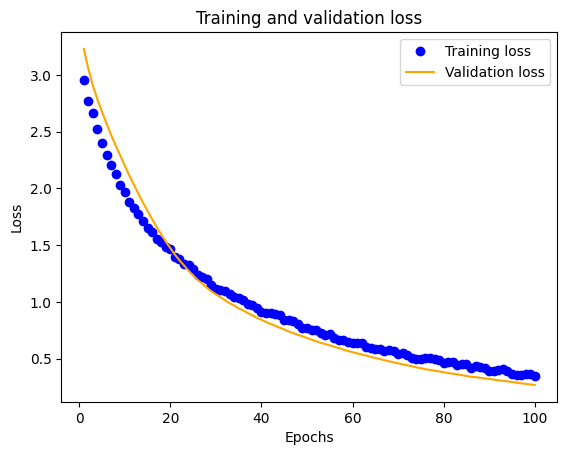

In [9]:
#for batchsize = 20
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import os

model_path = 'my_model_v3.h5'

if os.path.exists(model_path):
    os.remove(model_path)

model.save(model_path)

ValueError: ignored